# Intervalos de Confiança

Neste notebook, vamos aprender a calcular intervalos de confiança.

## Uma breve introdução

Embora intervalos de confiança sejam amplamente usados, pode ser difícil entender seu conceito e quando devemos usá-lo. Então vamos a um exemplo:

Suponha que você queira saber qual a porcentagem de pessoas nos Brasil que amam futebol. Para obter uma resposta 100% correta a essa pergunta, você deveria perguntar a cada um dos 212 milhões habitantes se eles amam ou não futebol. Obviamente, não é viável falar com 212 milhões de pessoas.

Você poderia então obter uma amostra aleatória de brasileiros (falando com muito menos pessoas) para obter a porcentagem de pessoas que amam futebol nessa amostra. Contudo, assim não estaria 100% confiante de que esse número está certo ou quão longe esse número está da resposta real.

Você poderia tentar obter um intervalo, como: “Tenho 95% de certeza que a porcentagem de pessoas que amam futebol nos EUA está entre 58% e 62%”. É daí que vem o nome Intervalo de confiança, temos um intervalo e temos alguma confiança sobre ele.

## Como calcular intervalos de confiança

O cálculo do intervalo de confiança (ou CI, Confidence Interval) envolve a melhor estimativa obtida pela amostra (média ou mediana) e uma margem de erro. A margem de erro é calculada usando o Z-score para a confiança desejada multiplicada pelo desvio padrão amostral da média.


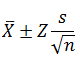




Em que image.png é a média amostral, Z é o valor de Z-score associado ao nível de confiança desejado, e image.png é o desvio padrão amostral da média.

Aqui estão os z-scores para os níveis de confiança mais comuns:

Confiança | Z

75%       | 1.15

90%       | 1.64

95%       | 1.96

99%       | 2.57

## Vamos ao código!

In [3]:
import pandas as pd
import numpy as np

## Base de dados
Para este exercício, vamos utilizar uma base de dados do site [basedosdados.org](https://basedosdados.org), uma organização colaborativa que cataloga e divulga dados públicos brasileiros. Vocês podem usar esse site para buscar bases para projetos acadêmicos, sempre que necessitarem. Outro exemplo de site de reúne bases abertas (nesse caso, americanas) é o [UCI](https://archive.ics.uci.edu/ml/index.php). 

Vamos usar a base de "Indicadores de Mobilidade e Transportes em 2010" para analisar os dados sobre tempo médio de deslocamento casa-trabalho para o ano de 2010.

Para usar o arquivo, podemos usar duas opções: (1)  baixar o csv e importá-lo (usando pandas), ou (2) usar diretamente o pacote do basededados. 

### Opção 1: 
Baixar a tabela 'tempo_deslocamento_casa_trabalho' em https://basedosdados.org/dataset/br-mobilidados-indicadores, adicionar em Files (menu da esquerda) e importar com pandas

In [4]:
df = pd.read_csv("tempo_deslocamento_casa_trabalho.csv")

### Opção 2:
Instalar o pacote basedosdados, e importar a base diretamente. Mais detalhes em: https://basedosdados.github.io/mais/access_data_packages/#primeiros-passos.

Vocês terão que criar um projeto em https://console.cloud.google.com/projectselector2/home/dashboard?pli=1 para pegar o billing_project_id (ID do projeto)

In [5]:
#!pip install basedosdados
#import basedosdados as bd
# Para carregar o dado direto no pandas
#df = bd.read_table(dataset_id='br_mobilidados_indicadores', 
#            table_id='tempo_deslocamento_casa_trabalho',\
#            billing_project_id=<ID_PROJETO>)#colocar aqui o ID do projeto do gcloud
            #billing_project_id='censo-331617')


In [6]:
df

,ano,sigla_uf,id_municipio,tempo_medio_deslocamento,prop_deslocamento_acima_1_hora
0,2010,RO,1100205,28,7.0
1,2010,AC,1200401,26,5.0
2,2010,PA,1202400,21,3.0
3,2010,PA,1206500,25,7.0
4,2010,AM,1302603,41,17.0
...,...,...,...,...,...
224,2010,GO,5220686,16,2.0
225,2010,GO,5221858,47,28.0
226,2010,GO,5222203,25,5.0
227,2010,GO,5222302,24,8.0


Antes de começarmos a análise, é importante explorar se há valores faltantes.

In [7]:
df['tempo_medio_deslocamento'].isnull().sum()

0

Não há valores faltantes.

### Vamos calcular o intervalo de confiança para o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.

In [8]:
## Primeiro, vamos calcular a media e o o desvio padrao
media_mg = np.mean(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])
std_mg = np.std(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])

print('O tempo médio de deslocamento no estado de MG é de', \
      np.round(media_mg,2), 'e o desvio padrão é de', np.round(std_mg,2))

O tempo médio de deslocamento no estado de MG é de 33.95 e o desvio padrão é de 10.49


In [9]:
## Agora, voltando à tabela do Z-score, vemos que o valor de Z 
##correspondente a um nível de confiança de 95% é de 1.96
## Assim, podemos calcular o intervalo de confiança:

z = 1.96
CI_inf_mg = media_mg - z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
CI_sup_mg = media_mg + z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))

In [10]:
print('(', np.round(CI_inf_mg,2), ',',np.round(CI_sup_mg,2), ')')

( 30.61 , 37.28 )


## Exercício 1

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de MG, considerando um nível de confiança de 90%?

In [11]:
z = 1.64
media_mg = np.mean(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])
std_mg = np.std(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])
CI_inf_mg = media_mg - z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
CI_sup_mg = media_mg + z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
print('(', np.round(CI_inf_mg,2), ',',np.round(CI_sup_mg,2), ')')

( 31.16 , 36.74 )


## Exercício 2

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [12]:
z = 1.96
media_sp = np.mean(df.loc[df['sigla_uf'] == 'SP', 'tempo_medio_deslocamento'])
std_sp = np.std(df.loc[df['sigla_uf'] == 'SP', 'tempo_medio_deslocamento'])
CI_inf_sp = media_sp - z*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
CI_sup_sp = media_sp + z*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
print('(', np.round(CI_inf_sp,2), ',',np.round(CI_sup_sp,2), ')')

( 41.86 , 47.16 )


## Exercício 3

Qual é o CI do tempo **mediano** de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [13]:
z = 1.96
median_sp = np.median(df.loc[df['sigla_uf'] == 'SP', 'tempo_medio_deslocamento'])
std_sp = np.std(df.loc[df['sigla_uf'] == 'SP', 'tempo_medio_deslocamento'])
CI_inf_sp = median_sp - z*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
CI_sup_sp = median_sp + z*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
print('(', np.round(CI_inf_sp,2), ',',np.round(CI_sup_sp,2), ')')

( 42.35 , 47.65 )


### Biblioteca scipy.stats

O módulo de funções estatísticas scipy stats nos permite calcular o CI chamando apenas uma função. Para maiores informações, ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

In [14]:
import scipy.stats as st

#Voltando ao problema inicial, vamos calcular o intervalo de confiança para 
#o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.
#alpha = nivel de confiança
#loc = array dos dados para media
#scale = desvio padrão amostral da média

ci = st.norm.interval(alpha=0.95, loc=np.mean(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento']), \
                      scale=st.sem(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'], \
                                   ddof=0, nan_policy='omit'))

In [15]:
np.round(ci,2)

array([30.61, 37.28])

## Exercício 4

Usando a biblioteca scipy.stats, calcule e imprima o CI do tempo médio de deslocamento para cada estado brasileiro, com nível de confiança de 99% .

In [16]:
#Dica: a função unique dá o array de todos os estados
array_estados = df['sigla_uf'].unique()

In [17]:
for estado in array_estados:
  ci = st.norm.interval(alpha=0.99, loc=np.mean(df.loc[df['sigla_uf']==estado, 'tempo_medio_deslocamento']), \
                        scale=st.sem(df.loc[df['sigla_uf']==estado,'tempo_medio_deslocamento'], \
                                     ddof=0, nan_policy='omit'))
  li, ls = ci
  print(estado)
  print(np.round(ci, 2))

RO
[nan nan]
AC
[nan nan]
PA
[25.98 40.02]
AM
[nan nan]
RR
[nan nan]
AP
[nan nan]
TO
[nan nan]
MA
[nan nan]
PI
[nan nan]
CE
[22.25 29.01]
RN
[nan nan]
PB
[nan nan]
PE
[34.31 43.82]
AL
[nan nan]
SE
[nan nan]
BA
[27.55 35.06]
MG
[29.56 38.33]
ES
[nan nan]
RJ
[39.85 51.49]
SP
[41.08 47.95]
PR
[29.2  37.97]
SC
[nan nan]
RS
[nan nan]
MS
[nan nan]
MT
[nan nan]
GO
[24.13 36.13]
DF
[nan nan]


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


## Exercício 5
Se não há valores valores, por que a função retorna NA para alguns estados?

**Resposta**: O loop faz com que os valores sejam buscados, mesmo não existindo.

## Exercício 6 

Crie uma visualização (a seu critério) para mostrar os intervalos de confiança dos estados com valores não nulos. Qual padrão você observa?

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


PA
CE
PE
BA
MG
RJ
SP
PR
GO


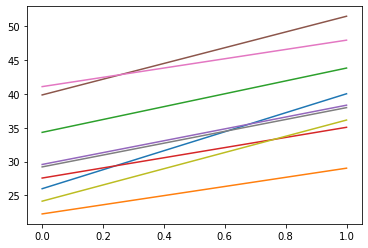

In [18]:
import matplotlib.pyplot as plt
for estado in array_estados:
  ci = st.norm.interval(alpha=0.99, loc=np.mean(df.loc[df['sigla_uf']==estado, 'tempo_medio_deslocamento']), \
                        scale=st.sem(df.loc[df['sigla_uf']==estado,'tempo_medio_deslocamento'], \
                                     ddof=0, nan_policy='omit'))
  li, ls = ci
  if (not pd.isna(li)):
    print(estado)
    plt.plot(ci)



**Resposta**: Os estados seguem um pedrão nas retas, mostrando que a discrepancia de atrasos não é tão alta assim.